# 데이터셋 선택
- 자동차 연비 데이터셋 (Auto MPG, UCI)
: 자동차의 엔진 배기량, 무게, 실린더 수 등과 연비(mpg) 관계 분석

- 보스턴 주택 가격 데이터셋 (Boston Housing, sklearn 내장)
: 방 개수, 범죄율, 고속도로 접근성 등과 주택 가격 관계 분석

- 세계 행복 보고서 (World Happiness Report, Kaggle)
: GDP, 사회적 지지, 기대 수명 등과 행복 지수 관계 분석

# 1. 자동차 연비 데이터 분석 시나리오

## 1) 문제 정의

- 질문 -> "자동차의 무게와 배기량은 연비에 어떤 영향을 미칠까?"

- 가설 -> 자동차 무게와 배기량이 증가할수록 연비는 감소할 것이다.

## 2) 데이터 불러오기 & 탐색

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 컬럼 이름 미리 지정
column_names = ["mpg", "cylinders", "displacement", "horsepower", 
                "weight", "acceleration", "model_year", "origin", "car_name"]

df = pd.read_csv("auto-mpg.data", sep='\\s+', names=column_names) # '\s+' 정규식에서 하나 이상의 공백이라는 의미


In [3]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


## 3) 데이터 전처리
- 결측치 제거 및 대체 -> 결측값은 없....는 것 처럼 보였으나...
- 'horsepower'에 이상한 값들이 있음 -> 이상한 값 제거하는걸로
- 이상치 제거 -> 간단하게 진행하기 위해 일단 이번 실습에서는 x
- origin 칼럼의 경우 범주형 데이터 (그런데 순서가 없음에도 단순 숫자로 라벨링 되어 있음) -> 원-핫 인코딩 필요
    - 1 → 미국(USA)
    - 2 → 유럽(Europe)
    - 3 → 일본(Japan)

In [6]:
sum(df['horsepower'] == "?")

6

In [7]:
df["horsepower"] = df["horsepower"].replace("?", np.nan)

In [8]:
sum(df['horsepower'] == "?")

0

In [9]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [11]:
# horsepower가 좀 이상한게 값은 숫자인데 타입이 문자로 되어 있는 듯 -> 강제로 실수값으로 변경 (나중에 회귀를 사용하기 위함)
df["horsepower"] = df["horsepower"].astype(float)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [13]:
df = df.dropna()

In [14]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [15]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [16]:
df = pd.get_dummies(df, columns=["origin"], prefix="origin", drop_first = True)

In [17]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name,origin_2,origin_3
0,18.0,8,307.0,130.0,3504.0,12.0,70,chevrolet chevelle malibu,False,False
1,15.0,8,350.0,165.0,3693.0,11.5,70,buick skylark 320,False,False
2,18.0,8,318.0,150.0,3436.0,11.0,70,plymouth satellite,False,False
3,16.0,8,304.0,150.0,3433.0,12.0,70,amc rebel sst,False,False
4,17.0,8,302.0,140.0,3449.0,10.5,70,ford torino,False,False
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,ford mustang gl,False,False
394,44.0,4,97.0,52.0,2130.0,24.6,82,vw pickup,True,False
395,32.0,4,135.0,84.0,2295.0,11.6,82,dodge rampage,False,False
396,28.0,4,120.0,79.0,2625.0,18.6,82,ford ranger,False,False


In [18]:
# 타입을 int로 변환 -> 이거 안해두면 나중에 회귀할 때 문제 생김
for col in ["origin_2", "origin_3"]:
    df[col] = df[col].astype(int)


In [19]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name,origin_2,origin_3
0,18.0,8,307.0,130.0,3504.0,12.0,70,chevrolet chevelle malibu,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,buick skylark 320,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,plymouth satellite,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,amc rebel sst,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,ford torino,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,ford mustang gl,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,vw pickup,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,dodge rampage,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,ford ranger,0,0


## 4) 상관관계 분석

- 수치형 데이터만 가능 (그래서 범주형 변수인 car_name은 빼고 진행하며 origin도 숫자로 맵핑 되어 있지만 사실상 범주형이라 의미 없음)

In [20]:
df_corr = df.drop(['car_name', 'origin_2', 'origin_3'], axis = 1)

In [21]:
df_corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504.0,12.0,70
1,15.0,8,350.0,165.0,3693.0,11.5,70
2,18.0,8,318.0,150.0,3436.0,11.0,70
3,16.0,8,304.0,150.0,3433.0,12.0,70
4,17.0,8,302.0,140.0,3449.0,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82
394,44.0,4,97.0,52.0,2130.0,24.6,82
395,32.0,4,135.0,84.0,2295.0,11.6,82
396,28.0,4,120.0,79.0,2625.0,18.6,82


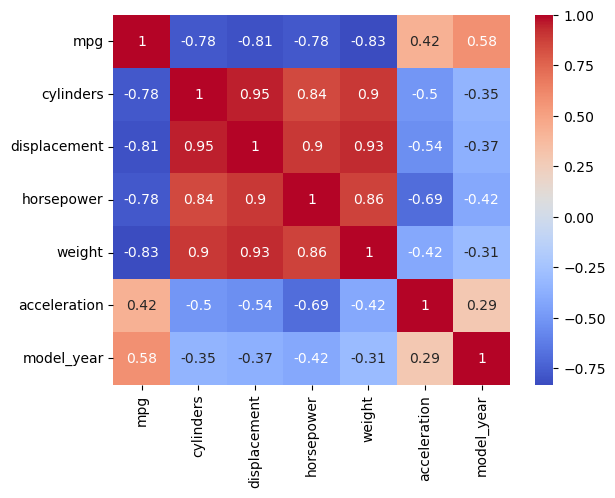

In [22]:
corr = df_corr.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

In [23]:
# 참고! pandas 1.5 이상부터는 pandas의 corr 함수에서 직접 수치형 변수만 고려하게 가능

In [24]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name,origin_2,origin_3
0,18.0,8,307.0,130.0,3504.0,12.0,70,chevrolet chevelle malibu,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,buick skylark 320,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,plymouth satellite,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,amc rebel sst,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,ford torino,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,ford mustang gl,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,vw pickup,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,dodge rampage,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,ford ranger,0,0


In [25]:
corr_numeric = df.corr(numeric_only=True)

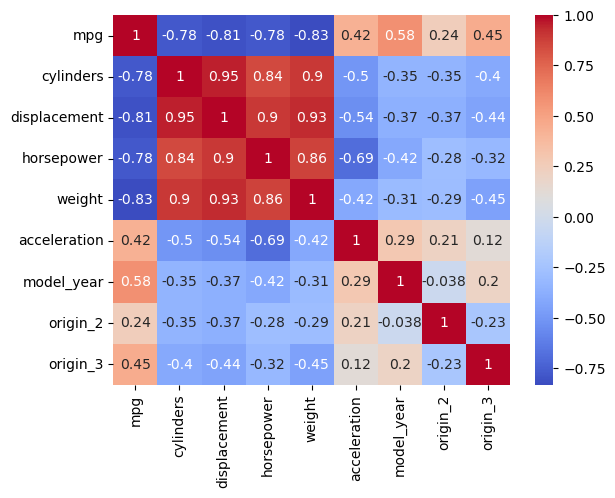

In [26]:
sns.heatmap(corr_numeric, annot=True, cmap="coolwarm")
plt.show()

## 해석

- 연비(mpg)와의 관계

- weight, displacement, cylinders와 강한 음의 상관
    - 차가 무겁거나, 배기량·실린더 수가 많을수록 연비는 떨어진다. (연료 효율이 나쁨)

- acceleration, model_year와는 양의 상관
    - 가속 성능이 좋거나, 최신 연식일수록 연비가 좋은 경향


## 다중공선성

- 그런데, 실린더 수가 많을수록 배기량이 크고, 배기량이 크면 차가 무거운 경향
- 사실상 비슷한 정보를 담고 있어서, 회귀 모델에 동시에 넣으면 다중공선성(multicollinearity) 문제 발생 가능
- 특징 선택(feature selection)을 진행하여 이 중에 하나만 선택하는 것을 권장 -> 하지만 일단 이렇게 두고 있다가 회귀 진행해볼게요 (보여주고 싶은게 있어서)

In [27]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [28]:
X = df[["weight", "displacement", "cylinders"]]
X = sm.add_constant(X) # 상수항 추가 -> 없으면 부정확할 수 있음 (없으면 회귀직선이 반드시 원점을 지나야 하는 특수한 상황이어야 하기 때문)
for i in range(X.shape[1]):
    print(variance_inflation_factor(X.values, i))

46.555990178228576
7.788716310583581
15.786455411619693
10.51550774255063


### 해석
- VIF ≈ 1 → 다중공선성 없음

- VIF 5 이상 → 다중공선성 의심, 주의 필요

- VIF 10 이상 → 심각한 다중공선성

- (상수항은 해석 대상이 아님)

### 상수항을 왜 추가할까?

- 모든 변수가 0이더라도 y가 꼭 0이 되리란 보장은 없음 -> 상수항 필요
- 이론적으로 “원점(0,0)”을 반드시 지나야 하는 물리적 모델이거나 데이터를 평균 중심화 한다면 상수항이 필요 없을 수 있음
  

### 코드 좀 더 다듬은 버젼

In [29]:
# 좀더 깔끔하게 코드를 다듬어서 사용한다면?

# 다중회귀에 쓴 변수들
X = df[["weight", "displacement", "cylinders"]]

# 상수항 추가
X = sm.add_constant(X)

# VIF 계산
vif_df = pd.DataFrame()
vif_df["variable"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df)

       variable        VIF
0         const  46.555990
1        weight   7.788716
2  displacement  15.786455
3     cylinders  10.515508


## 5) 단순 선형 회귀

In [30]:
import statsmodels.api as sm

X = df["weight"]
y = df["mpg"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Thu, 25 Sep 2025   Prob (F-statistic):          6.02e-102
Time:                        09:43:32   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2165      0.799     57.867      0.0

## 해석
1. 모형 설명력

- R-squared = 0.693
→ 차량 무게(weight) 하나만으로 연비(mpg) 변동의 약 69.2%를 설명할 수 있음.
→ 단일 독립변수치고는 상당히 높은 설명력.

2. 회귀계수

- const(절편) = 46.2165
→ 이론적으로 차량 무게가 0일 때 예상 연비는 약 46.2 mpg. (실제 의미는 없고 기준선 역할)

- weight = -0.0076
→ 차량 무게가 1 파운드 늘어날 때마다 연비는 평균적으로 0.0076 mpg 감소.
→ 예: 차량 무게가 1,000 파운드 증가하면 연비는 약 7.6 mpg 줄어듦.

3. 통계적 유의성

- weight의 p-value = 0.000 (유의수준 0.05보다 훨씬 작음)
→ 무게가 연비에 유의미한 영향을 준다고 볼 수 있음.

- const도 p-value=0.000으로 통계적으로 유의.

4. 신뢰구간

- weight의 95% 신뢰구간: [-0.008, -0.007]
→ 계수가 음수임이 확실하다 → 무게 증가 → 연비 감소.

### 회귀에서의 가설검정(t-test)
- 귀무가설 : 해당 변수가 종속변수에 유의한 영향을 주지 않는다
- 대립가설 : 해당 변수가 유의미한 영향을 준다

## 6) 다중 회귀

In [31]:
X = df[["weight", "displacement", "cylinders"]]
y = df["mpg"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     300.8
Date:                Thu, 25 Sep 2025   Prob (F-statistic):          7.59e-101
Time:                        09:43:32   Log-Likelihood:                -1125.7
No. Observations:                 392   AIC:                             2259.
Df Residuals:                     388   BIC:                             2275.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           44.3710      1.481     29.967   

1. 모형 설명력

- R-squared = 0.699, Adj. R-squared = 0.697
→ 세 변수를 함께 쓰면 연비 변동의 약 69.8%를 설명.
→ 이전 단순회귀(weight만)와 비교하면 R² 0.693 → 0.699로 거의 차이가 없음.
→ 추가 변수들이 설명력 개선에 별로 기여하지 못했음.

2. 회귀계수 & 유의성

- weight = -0.0057 (p = 0.000)
→ 유의하게 음의 영향. 무게가 1 파운드 증가할 때 연비가 약 0.0058 mpg 감소.
→ 여전히 주요 설명 변수.

- displacement = -0.0127 (p = 0.125)
→ 음의 계수이지만 통계적으로 유의하지 않음. (연비에 독립적 영향 못 줌)

- cylinders = -0.2678 (p = 0.517)
→ 계수도 작고 p-value도 큼. 연비에 유의한 설명력을 주지 못함.

### Adj.(Adjusted) R-squared는 뭐지? 
- 기존의 R-squared는 독립변수가 많으면 많을 수록 값이 무조건 커지는 경향이 있음 따라서, 변수 개수를 고려해서 보정한 값이 이것!
- 즉, 변수 계수를 고려한 실질적인 R-squared 계수!

In [32]:
df_reg = df.drop(['car_name', 'mpg'], axis = 1)

In [33]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     392 non-null    int64  
 1   displacement  392 non-null    float64
 2   horsepower    392 non-null    float64
 3   weight        392 non-null    float64
 4   acceleration  392 non-null    float64
 5   model_year    392 non-null    int64  
 6   origin_2      392 non-null    int32  
 7   origin_3      392 non-null    int32  
dtypes: float64(4), int32(2), int64(2)
memory usage: 24.5 KB


In [34]:
X = df_reg
y = df["mpg"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     224.5
Date:                Thu, 25 Sep 2025   Prob (F-statistic):          1.79e-139
Time:                        09:43:32   Log-Likelihood:                -1020.5
No. Observations:                 392   AIC:                             2059.
Df Residuals:                     383   BIC:                             2095.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.9546      4.677     -3.839   

1. 모델 적합도

- R-squared = 0.824, Adj. R-squared = 0.821
→ 이 모델은 연비 변동의 82% 이상을 설명함.

- F-statistic (224.5, p < 0.001)
→ 전체 회귀모형이 통계적으로 유의함.

2. 회귀계수 해석

- weight = -0.0067 (p < 0.001)
→ 무게가 1 파운드 늘면 연비가 0.0067 mpg 줄어듦 → 강하게 유의.

- cylinders = -0.4897 (p = 0.128)
→ 음의 관계지만 유의하지 않음.

- displacement = +0.0240 (p = 0.022)
→ 배기량이 커질수록 연비가 늘어난다고 나오지만, 실제로는 weight 등 다른 변수와의 다중공선성 때문일 가능성 높음.

- horsepower = -0.0182 (p = 0.185)
→ 유의하지 않음.

- acceleration = +0.0791 (p = 0.805)
→ 영향 거의 없음.

3. 시대적 요인

- model_year = +0.7770 (p < 0.001)
→ 연식이 1년 증가할 때마다 연비가 평균적으로 0.78 mpg 늘어남.
→ 시간이 지날수록 연비 기술 발전(오일 쇼크 이후의 연비 개선 정책 반영).

4. 제조 지역(origin, 기준 = 미국)

- origin_1 (USA): -5.8595 (p < 0.001)
→ 미국차는 기준 대비 연비가 평균적으로 5.9 mpg 낮음.

- origin_2 (Europe): -3.2295 (p = 0.005)
→ 유럽차는 기준 대비 연비가 3.2 mpg 낮음.

- origin_3 (Japan): -3.0062 (p = 0.015)
→ 일본차는 기준 대비 연비가 3.0 mpg 낮음.

### 해석
연비는 차량 무게가 무거울수록 줄고, 연식이 최근일수록 증가하며, 국가별 차이도 유의하게 존재한다. 하지만 엔진 관련 변수들은 서로 강하게 상관되어 있어 다중공선성 문제가 크므로 변수 선택이 필요하다

## 7) 예측 및 시각화

- 시각적으로도 "weight", "displacement", "cylinders" 가 증가할수록 연비가 감소하는 추세 확인

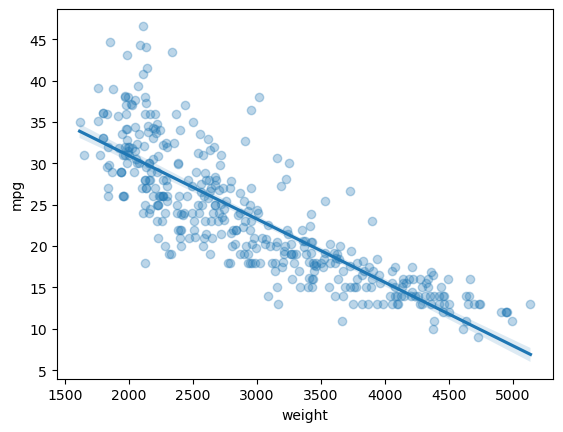

In [35]:
sns.regplot(x="weight", y="mpg", data=df, scatter_kws={"alpha":0.3})
plt.show()


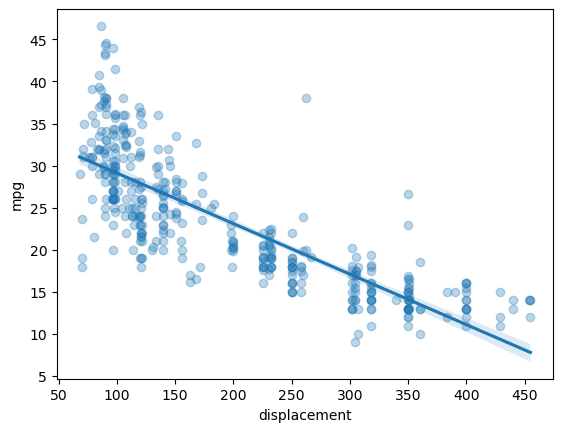

In [36]:
sns.regplot(x="displacement", y="mpg", data=df, scatter_kws={"alpha":0.3})
plt.show()

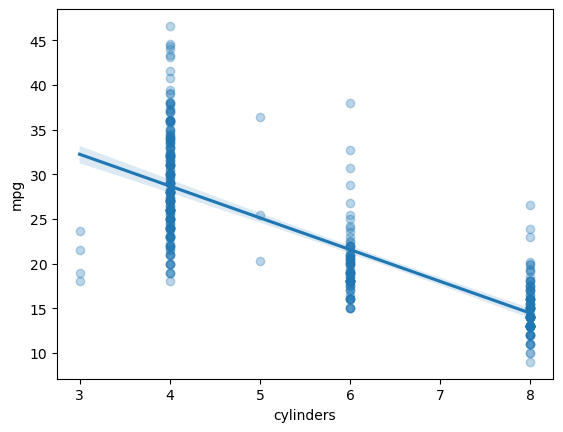

In [37]:
sns.regplot(x="cylinders", y="mpg", data=df, scatter_kws={"alpha":0.3})
plt.show()


## 8) 다중 회귀 (변수선택 고려해서)

In [38]:
df_reg2 = df.drop(['car_name', 'mpg', 'cylinders', 'acceleration', 'horsepower', 'displacement'], axis = 1)

In [39]:
X = df_reg2
y = df["mpg"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     437.9
Date:                Thu, 25 Sep 2025   Prob (F-statistic):          3.53e-142
Time:                        09:43:33   Log-Likelihood:                -1026.1
No. Observations:                 392   AIC:                             2062.
Df Residuals:                     387   BIC:                             2082.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.3069      4.017     -4.557      0.0

1. 모델 적합도

- R-squared = 0.819, Adj. R-squared = 0.817
→ 연비 변동의 약 82% 설명.
→ 이전 모델과 설명력은 동일, 다중공선성 경고도 완화됨.

- F-statistic = 437.9, p < 0.001
→ 전체 모델 유의.

2. 회귀계수 해석

- const = -18.3069
→ 이론적으로 모든 변수가 0일 때의 mpg (실제 의미보다는 절편 역할).

- weight = -0.0059 (p < 0.001)
→ 무게가 1 파운드 증가할 때 연비는 0.0059 mpg 감소.
→ 차량 무게는 여전히 가장 중요한 설명 변수.

- model_year = +0.7698 (p < 0.001)
→ 연식이 1년 늘어날 때마다 연비가 0.77 mpg 증가.
→ 시간이 지날수록 기술 발전 → 연비 개선.

- origin_2 (Europe) = +1.9763 (p < 0.001)
→ 유럽산 자동차는 미국산 대비 평균 약 2.0 mpg 더 높음.

- origin_3 (Japan) = +2.2145 (p < 0.001)
→ 일본산 자동차는 미국산 대비 평균 약 2.2 mpg 더 높음.

## 비즈니스 해석

### (1) 차량 무게(weight)

- 무게가 연비에 가장 큰 음(-)의 영향을 미침 (coef ≈ -0.006, p<0.001).

- -> 차량을 가볍게 만들수록 연비가 좋아진다.

- 시사점:

    - 경량화 소재(알루미늄, 탄소섬유 등) 기술 투자

    - 불필요한 옵션·부품 최적화로 무게 감축 전략 필요

## (2) 연식(model_year)

- 연식이 1년 증가할수록 연비는 약 0.77 mpg 개선 (p<0.001).

- -> 시간이 지나면서 신차의 연비 성능이 꾸준히 개선됨 → 기술 발전, 규제 영향 반영.

- 시사점:

    - 신차 마케팅에서 “연비 개선”을 핵심 포인트로 강조

    - 장기적으로 친환경차(하이브리드, 전기차) 개발 경쟁에서 앞서야 함

### (3) 제조국(origin)

- 미국(기준) 대비:

    - 유럽차: +2.0 mpg

    - 일본차: +2.2 mpg

- -> 미국차 대비 유럽·일본차의 연비 효율이 높음.

- 시사점:

    - 미국 업체: 글로벌 시장 경쟁에서 불리 → 연비 규제 대응 필요

    - 유럽·일본 업체: 연비 우수성을 마케팅 포인트로 활용 가능

    - 지역별 기술 차이를 벤치마킹해 전략적 협력 또는 기술 도입 고려

## 앞으로 더 분석해볼 수 있는 것

### (1) 세분화 분석(Segmentation)

차종별, 배기량 구간별, 실린더 수별로 그룹 나눠 연비 차이 확인

“어떤 세그먼트에서 연비 차이가 가장 크나?” 분석

### (2) 비선형 관계 탐색

weight, horsepower vs mpg 관계가 단순 직선이 아닐 수도 있음

다항회귀(polynomial regression)나 곡선 피팅으로 관계 개선 가능

### (3) ANOVA & 사후검정

origin 집단 간 mpg 차이를 ANOVA → Tukey 등 사후검정으로 확인

단순히 미국 vs 일본, 미국 vs 유럽뿐 아니라 집단 전체 차이 분석

### (4) 예측 모델 확장

통계적 회귀분석 → 머신러닝 회귀모델(Random Forest, XGBoost)로 확장

더 높은 예측 정확도로 연비 예측 → 신차 개발 시 시뮬레이션 활용

## (추가로 해보고 싶으신 분을 위해) 비선형 관계 탐색

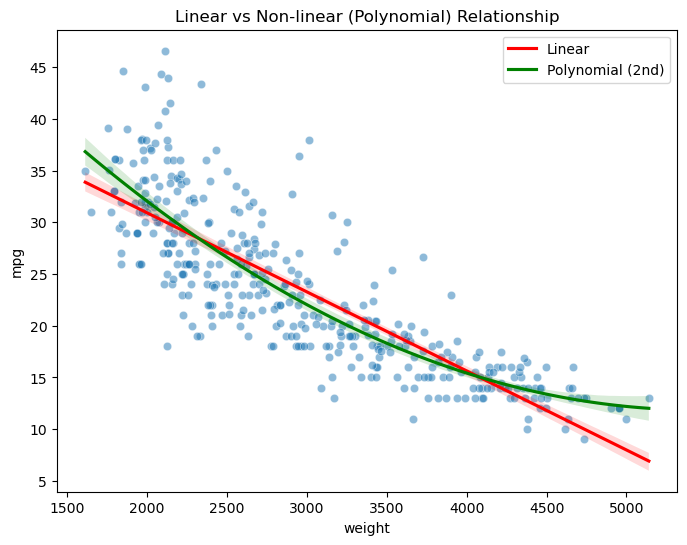

In [40]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="weight", y="mpg", data=df, alpha=0.5)

# 선형 회귀선
sns.regplot(x="weight", y="mpg", data=df, scatter=False, color="red", label="Linear")

# 2차 다항 회귀선
sns.regplot(x="weight", y="mpg", data=df, scatter=False, order=2, color="green", label="Polynomial (2nd)")

plt.legend()
plt.title("Linear vs Non-linear (Polynomial) Relationship")
plt.show()

In [41]:
from scipy.stats import pearsonr

r, pval = pearsonr(df["weight"], df["mpg"])
print(f"Pearson correlation: r = {r:.3f}, p-value = {pval:.5f}")

Pearson correlation: r = -0.832, p-value = 0.00000


In [42]:
from scipy.stats import spearmanr # 단조 관계에 잘 맞음 (X가 증가하면 Y도 증가하거나 감소하는데 속도가 일정할 필요는 X)

rho, pval = spearmanr(df["weight"], df["mpg"])
print(f"Spearman correlation: {rho:.3f}, p-value: {pval:.5f}")


Spearman correlation: -0.876, p-value: 0.00000


In [43]:
from scipy.stats import kendalltau # 작은 표본에 강점

tau, pval = kendalltau(df["weight"], df["mpg"])
print(f"Kendall's tau: {tau:.3f}, p-value: {pval:.5f}")


Kendall's tau: -0.694, p-value: 0.00000
